# **Business Use Cases of NLP**

Artificial intelligence technology for organizations is an inexorably prominent topic and everything except unavoidable for most of the organizations. It has the ability to automate support, improve client experiences, and analyze outputs and feedback.

While executing AI innovation may sound threatening, it doesn’t need to be. Natural language preparing (NLP) is a type of AI that is simple and easy to use. It can likewise complete a ton to help impel your business forward.

Natural Language Processing poses some exciting opportunities across various industries through analysis of the vast amount of data in order to deliver a better quality of service. This branch of AI considered as a critical one for navigating through the growing volume of data already in silos and generated daily. Let’s explore further how NLP serves benefit in different domains.

<hr>



### **NLP in Neural Machine Translation**

Neural machine translation has improved the imitation of professional translations over the years of its advancement. When applied in neural machine translation, natural language processing helps educate neural machine networks. This can be used by businesses to translate low impact content including emails, regulatory texts, etc. Such machine translation tools speed up communication with partners while enriching other business interactions.


### **NLP in Sentiment Analysis**

Sentiment analysis helps in estimating customer feedback on the brand and product while adjusting sales and marketing strategy. It is also termed as opinion mining which is capable of analyzing news and blogs assigning a value to the text (negative, positive or neutral) over social media platforms. As it stands now NLP algorithms can identify emotions such as happy, annoyed, angry, sad. Through the combination of sentiment analysis and NLP, marketers will have all it takes to develop actionable strategies and make well-informed decisions.

With regards to modifying sales and marketing strategy, sentiment analysis helps gauge how clients feel about your brand. This innovation, otherwise called opinion mining, originates from social media analysis and is fit for analyzing news and blogs allocating a value to the content (negative, positive or neutral). A Switzerland-based organization Sentifi utilizes NLP to discover influencers and characterize its key brand advocates. The present NLP algorithms go as far as recognizing emotions, for example, glad, irritated, grumpy, miserable. Obviously, with exact tools like these marketers currently, have everything necessary to create significant strategies and settle on informed decisions.

### **NLP in HR and Recruiting**

Using NLP in human resources, HR professionals can speed up candidate searches by filtering out relevant resumes and designing bias-proof and gender-neutral job descriptions. Also by making the use of semantic analysis, software sifts through the considerable synonyms enabling recruiters to detect candidates that meet the job requirements.


### **NLP in Advertising & Audience Analysis**

Through the analysis of digital footprint over social media, emails, search keywords, and browsing behavior, NLP enables advertisers to identify new audiences potentially interested in their products. Even a simple keyword matching routine companies can broaden the range of channels for ad placement, helping companies spend their ad budgets more effectively and target potential clients using NLP algorithms.

TV programs or live broadcast events are probably the most discussed topics on Twitter. Advertisers and TV makers can both profit by utilizing Text Analytics in two particular ways. If producers can get a comprehension of how their group of spectators ‘feels’ about specific characters, settings, storylines, highlighted music and so on, they can make changes in a bid to appease their viewers and consequently increase the crowd size and viewers ratings. Advertisers can delve into social media networking platform streams to analyze the viability of product placement and commercials broadcasted during the breaks. For instance, the TV character ‘Cersei’ from Game of Thrones is turning into a style symbol among fans, who consistently Tweet about her most recent gown.

High street retailers that need to exploit this pattern could come up with a line of Queen of Westeros’ style attire and adjust their commercials to shows like Game of Thrones. Text Analytics could likewise be utilized by TV Executives hoping to offer to advertisers. For instance, a TV organization could mine viewers tweets and discussion activity to profile their group of spectators all the more precisely. So rather than just pitching the size of their group of spectators to publicists, they could wow them by recognizing their gender, area, age and so forth and their emotions towards specific products.

### **NLP in Healthcare**

According to Becker’s Hospital Review, NLP can improve clinical documentation, data mining research, computer-assisted coding, automated registry reporting. In the context of emerging cases, it helps in clinical trial matching, clinical decision support, risk adjustment, and hierarchical condition categories.

Additionally, for next-generation advancements, NLP enables ambient virtual scribe, computational phenotyping and biomarker discovery and population surveillance.

<hr>

# **Sentiment Analysis**

**What is sentiment analysis?**
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

**Why sentiment analysis?**

-    **Business**: In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some products.
-    **Politics**: In political field, it is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level. It can be used to predict election results as well!
-    **Public Actions**: Sentiment analysis also is used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere.

<hr>

### __Import Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from collections import Counter
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Twitter Sentiment Analysis**

### With Random Forest Classifier

## **Loading Dataset**

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/satyajeetkrjha/kaggle-Twitter-US-Airline-Sentiment-/refs/heads/master/Tweets.csv")

In [5]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.shape

(14640, 15)

In [7]:
df['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df['sentiment'] = LabelEncoder().fit_transform(df['airline_sentiment'])

## **Exploratory Data Analysis**

<Axes: xlabel='airline_sentiment', ylabel='count'>

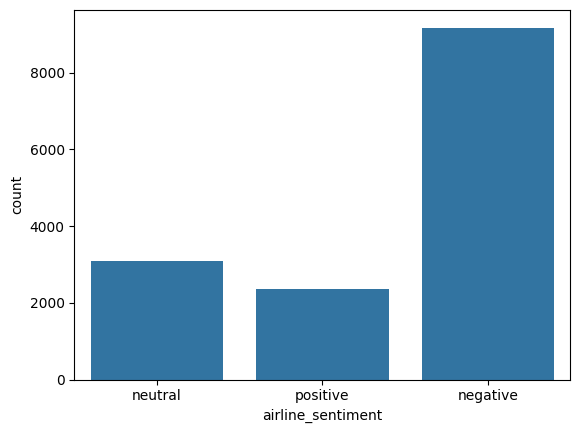

In [10]:
sns.countplot(x='airline_sentiment', data=df)

<Axes: xlabel='airline', ylabel='count'>

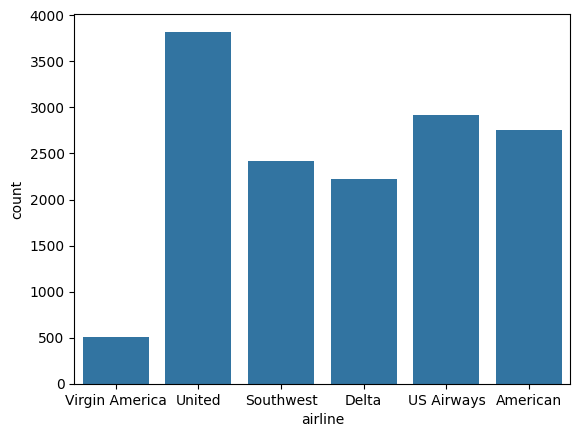

In [11]:
sns.countplot(x='airline', data=df)

<Axes: xlabel='airline', ylabel='count'>

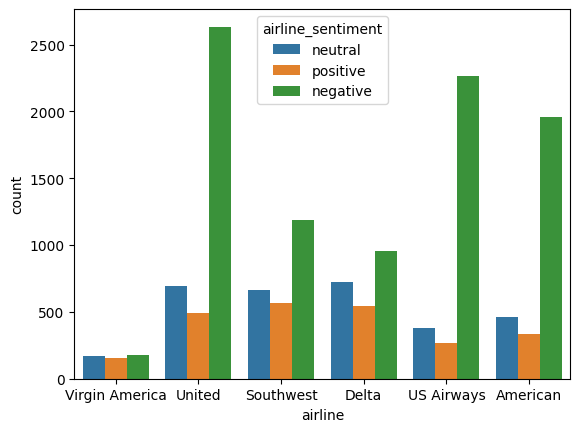

In [12]:
sns.countplot(x='airline', hue="airline_sentiment", data=df)

## **Data Preprocessing**

In [13]:
X = df.iloc[:, 10].values
y = df.iloc[:, -1].values

In [14]:
X[2]

"@VirginAmerica I didn't today... Must mean I need to take another trip!"

In [15]:
y

array([1, 2, 1, ..., 1, 0, 1])

In [16]:
df_clean = []

for i in range(0, len(X)):
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[i]))

    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)

    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()

    df_clean.append(processed_tweet)

In [17]:
df_clean[2]

' virginamerica didn today must mean need to take another trip '

## **TF-IDF**

Statistical approaches such as machine learning and deep learning work well with numerical data. However, natural language consists of words and sentences. Therefore, before you can build a sentiment analysis model, you need to convert text to numbers. Several approaches have been developed for converting text to numbers. Bag of Words, N-grams, and Word2Vec model are some of them.

``TF  = (Frequency of a word in the document)/(Total words in the document)``

`` IDF = Log((Total number of docs)/(Number of docs containing the word))``

In [18]:
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

X = tfidfconverter.fit_transform(df_clean).toarray()

In [19]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Spliting Dataset**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Fitting Model**

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## **Evaluating Model**

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1715  112   43]
 [ 328  241   45]
 [ 133   64  247]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1870
           1       0.58      0.39      0.47       614
           2       0.74      0.56      0.63       444

    accuracy                           0.75      2928
   macro avg       0.70      0.62      0.65      2928
weighted avg       0.74      0.75      0.74      2928

0.7523907103825137


In [25]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100,
                     recall_score(y_test, y_pred, average = 'macro')*100,
                     precision_score(y_test, y_pred, average = 'macro')*100,
                     f1_score(y_test, y_pred, average='macro')*100
                    ],
             index = ['accuracy', 'recall', 'precision', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,75.239071
recall,62.197558
precision,70.113149
f1_score,64.980149


<hr>

# **Reference**:
- Smriti Srivastava, "Top 5 Use Cases of NLP for Better Understanding of Its Potential", https://www.analyticsinsight.net/top-5-use-cases-of-nlp-for-better-understanding-of-its-potential/
- Priya Dialani, "Top 5 Business Use Cases of NLP and Text Mining", https://www.analyticsinsight.net/top-5-business-use-cases-of-nlp-and-text-mining/
- Vik Bogdanov, "8 Thought-Provoking Cases Of NLP And Text Mining Use In Business", https://becominghuman.ai/8-thought-provoking-cases-of-nlp-and-text-mining-use-in-business-60bd8031c5b5
- Nikhil Kumar, "Twitter Sentiment Analysis using Python", https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
